# Binary Logistic Regression

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc

Information about the data:  https://www.kaggle.com/hesh97/titanicdataset-traincsv

Variables:

    PassengerId - Id of the passenger
    Survived - binary variable: passenger survived (1) or not (0)
    Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    Name - Name of the passenger
    Sex - Sex of the passenger
    Age - Age of the passenger
    SibSp - Number of siblings / spouses aboard the Titanic	
    Parch - Number of parents / children aboard the Titanic
    Ticket - Ticket number	
    Fare - Passenger fare
    Cabin - Cabin number    
    Embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
df = pd.read_csv('titanic.csv', index_col=0)
df.head(25)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
# Types of variables
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['Survived' 'Pclass' 'SibSp' 'Parch']

Type: object
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']

Type: float64
['Age' 'Fare']



In [13]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values
Cabin,77.104377
Age,19.865320
Embarked,0.224467


### Dependent variable

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Categorical predictors

In [15]:
df['Pclass'].value_counts() #reference group: 3

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
Pclass_dummies=pd.get_dummies(df.Pclass, prefix='Pclass', prefix_sep='_')
Pclass_dummies.head()

,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1


In [17]:
df['Sex'].value_counts() #reference group: male

male      577
female    314
Name: Sex, dtype: int64

In [18]:
Sex_dummies=pd.get_dummies(df.Sex, prefix='Sex', prefix_sep='_')
Sex_dummies.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [19]:
df['Embarked'].value_counts() #reference group: S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
Embarked_dummies=pd.get_dummies(df.Embarked, prefix='Embarked', prefix_sep='_')
Embarked_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [21]:
df = pd.concat([df, Pclass_dummies, Sex_dummies, Embarked_dummies], axis=1) 
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,1,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0,0,0,1


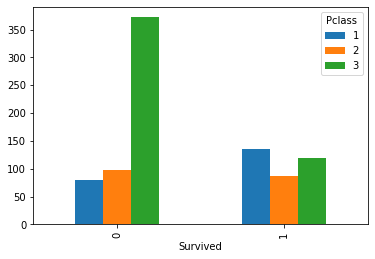

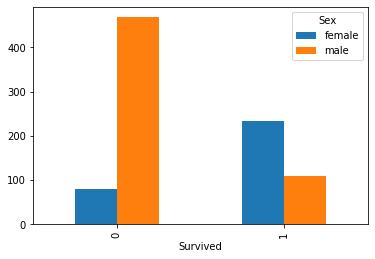

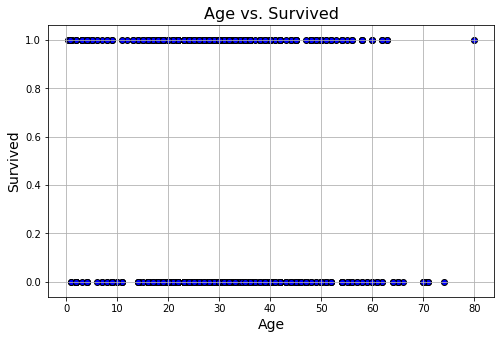

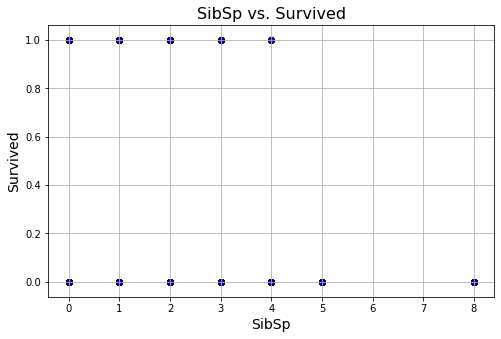

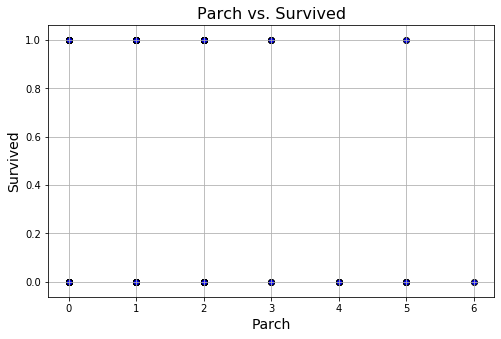

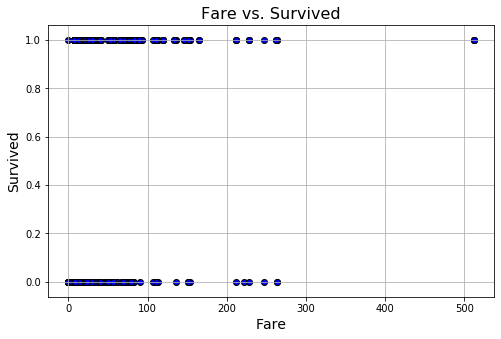

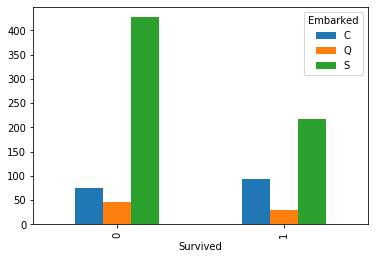

In [22]:
for c in df.columns[1:]:
    if c == 'Age' or c == 'Parch' or c=='Fare' or c=='SibSp':
        plt.figure(figsize=(8,5))
        plt.title('{} vs. Survived'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df.Survived, color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('Survived', fontsize=14)
        plt.show()
    elif c == 'Sex' or c == 'Pclass' or c=='Embarked':
        ct = pd.crosstab(df.Survived, df[c])
        ct.plot.bar()

# Regression

https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.html

In [23]:
df_model1 = df.dropna(subset=['Pclass_1', 'Pclass_2', 'Sex_female', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 
                              'Embarked_Q', 'Survived'])
df_model1.shape

(714, 19)

In [24]:
x_mult = df_model1[['Pclass_1', 'Pclass_2', 'Sex_female', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 
                              'Embarked_Q']]
y = df_model1['Survived']
x_mult_constant = sm.add_constant(x_mult)

In [25]:
model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.443215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            9
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                  0.3438
Time:                        14:12:38   Log-Likelihood:                -316.46
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.069e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0092      0.286     -3.524      0.000      -1.571      -0.448
Pclass_1       2.4031      0.

In [26]:
coefs = pd.DataFrame()
coefs['Coefs'] = model1.params[1:]
coefs['Features'] = model1.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model1.params[0])
coefs
#regression coefficients

Intercept =  -1.0092192317982438


,Coefs
Features,
Pclass_1,2.403080
Pclass_2,1.203978
Sex_female,2.648341
Age,-0.043131
SibSp,-0.364668
Parch,-0.062502
Fare,0.001484
Embarked_C,0.395724
Embarked_Q,-0.426118


In [27]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs
#regression coefficient and odds ratio

,Coefs,OddsRatio
Features,,
Pclass_1,2.403080,11.057186
Pclass_2,1.203978,3.333349
Sex_female,2.648341,14.130577
Age,-0.043131,0.957786
SibSp,-0.364668,0.694427
Parch,-0.062502,0.939412
Fare,0.001484,1.001486
Embarked_C,0.395724,1.485460
Embarked_Q,-0.426118,0.653039


In [28]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'

In [29]:
pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
Pclass_1,0.000,significant
Pclass_2,0.000,significant
Sex_female,0.000,significant
Age,0.000,significant
SibSp,0.005,significant
Parch,0.614,non-significant
Fare,0.568,non-significant
Embarked_C,0.149,non-significant
Embarked_Q,0.444,non-significant


In [30]:
pvals['10% level'] = model1.pvalues[1:].apply(lambda x: yes_no(x, level=0.1))
pvals

,p_values,5% level,10% level
Features,,,
Pclass_1,0.000,significant,significant
Pclass_2,0.000,significant,significant
Sex_female,0.000,significant,significant
Age,0.000,significant,significant
SibSp,0.005,significant,significant
Parch,0.614,non-significant,non-significant
Fare,0.568,non-significant,non-significant
Embarked_C,0.149,non-significant,non-significant
Embarked_Q,0.444,non-significant,non-significant


### Model Characteristics

In [31]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.343805
Model significance = 0.000000


Model is statistically significant. It explains 34,3% of the variation of the dependent variable.

In [32]:
f'Statistically significant model parameters: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' 'Pclass_1' 'Pclass_2' 'Sex_female' 'Age' 'SibSp']"

In [33]:
f'Statistically nonsignificant model parameters: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['Parch' 'Fare' 'Embarked_C' 'Embarked_Q']"

### Regression equation

In [26]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = -1.009219 + 2.40*Pclass_1 + 1.20*Pclass_2 + 2.65*Sex_female + -0.04*Age + -0.36*SibSp + -0.06*Parch + 0.00*Fare + 0.40*Embarked_C + -0.43*Embarked_Q


### Regression coefficients interpretation

- One unit increase in age will decrease the odds to survive by 4.3%.
- For females the odds to survive was 14 times greater than for males. 
- One additional relative on the board will decrease the odds to survive by 30%.
- For people from the 1st class the odds to survive was 11 times greater than for people from 3rd class. 
- For people from the 2nd class the odds to survive was 3.3 times greater than for people from 3rd class. 
- The other predictors are not significant (....)

### Confusion matrix

In [34]:
cm = model1.pred_table()
cm

array([[365.,  59.],
       [ 83., 207.]])

In [35]:
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 365.0 | FN: 59.0
-------------------
FP: 83.0  | TN: 207.0


In [37]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.8011204481792717


### ROC-curve

In [30]:
fpr, tpr, _ = roc_curve(df_model1.Survived, model1.predict())
roc_auc = auc(fpr, tpr)

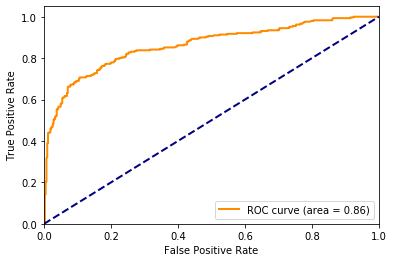

In [31]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#  Model Diagnostics

### Residuals

In [32]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


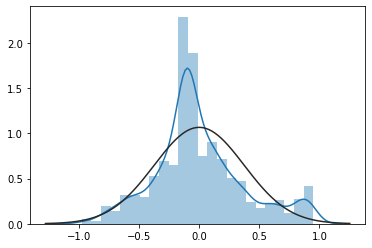

In [33]:
sns.distplot(model1.resid_generalized, fit=stats.norm) 

Distribution of residuals is different from the normal distribution.

### Multicollinearity

In [34]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [35]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
8,1.035212,Embarked_Q
2,1.127575,Sex_female
7,1.172034,Embarked_C
1,1.208222,Pclass_2
4,1.285494,SibSp
5,1.290577,Parch
3,1.331533,Age
6,1.768004,Fare
0,2.179300,Pclass_1


There are no VIF values greater than 10. There is no multicollinearity problem.

### Save the predicted probability of an event occurring for each observation

In [36]:
df_model1['probability'] = model1.predict()
df_model1

C:\Users\amelikyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,probability
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1,0.090133
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0,0.926905
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1,0.629361
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1,0.904371
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1,0.075379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,0,1,1,0,0,1,0,0.323358
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1,0,0,1,0.278788
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,1,0,0,0,1,0.963288
